## Final Project Submission

Please fill out:
* Student name: Tia Plagata
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


# Linear Regression


In [4]:
# Import statements
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.color_palette("ch:s=.25,rot=-.25")

In [34]:
# Functions
def check_vif(df, target_col):
    """
    input a pandas dataframe, and name of the target column in ''
    checks vif score and returns vif score and whether or not there is multicollinearity of features with the target.
    """
    
    ols = build_sm_ols(df=df, target_col=target_col)
    vif = 1 / (1 - ols.rsquared)
    if vif <= 3:
        print('Good, low multi-collinearity. VIF:', vif)
    if vif <=5: 
        print('Passable, but not great. VIF:', vif)
    else:
        print('Not good. Strong multicollinearity. VIF:', vif)
        
    
def plot_corr(df):
    """
    input a pandas dataframe 
    returns a seaborn heatmap with correlations annotated.
    """
    corr = df.corr().abs()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, cmap=cmap)
    plt.show()
    
def build_sm_ols(df, target_col, add_constant=False, show_summary=False):
    """
    input a pandas dataframe and target column name in ''
    returns an ols model built with statsmodels
    if summary_on=True, returns ols summary
    if add_constant=True, adds constant to model
    """
    X = df.drop(columns=[target_col])
    if add_constant:
        X = sm.add_constant(X)
    y = df[target_col]
    ols = sm.OLS(y, X).fit()
    if show_summary:
        print(ols.summary())
    return ols

def normalize_feature(feature):
    """
    input a feature column name in as df['feature']
    returns series of normalized feature values
    """
    return (feature - feature.mean()) / feature.std()

In [15]:
df = pd.read_csv('/Users/jordanrjohnson/DataScienceCourseMaterial/phase_2/dsc-phase-2-project-online/data/kc_house_data_cleaned.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [17]:
# Add our engineered features from the EDA
df['price_per_lotsqft'] = df['price'] / df['sqft_lot']

df['price_per_livingsqft'] = df['price'] / df['sqft_living']

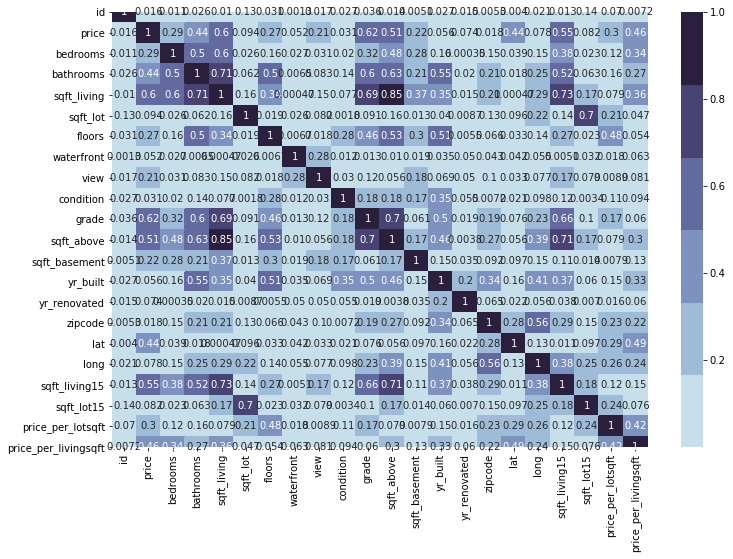

In [18]:
plot_corr(df)

In [35]:
# Create a model to test using the following features
features_to_use = ['bedrooms', 'sqft_living', 'condition', 'grade', 'price']
test_df = df[features_to_use]

build_sm_ols(df=test_df, target_col='price', show_summary=True)


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                          5.361e+04
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:13:25   Log-Likelihood:                     -2.6731e+05
No. Observations:               20057   AIC:                                  5.346e+05
Df Residuals:                   20053   BIC:                                  5.347e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [36]:
# Check the VIF score of this model
check_vif(test_df, target_col='price')

Not good. Strong multicollinearity. VIF: 11.693143224799533


In [43]:
# Seattle-proper Zipcodes to create feature: suburbs 0 or 1
city_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109,
98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133,
98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]

df['seattle_proper'] = [lambda x: x == 1 if df['zipcode'].isin(city_zips) else x == 0]

df.head()

ValueError: Length of values does not match length of index